# Higher Diploma in Science in Computing (Data Analytics)  

**University**: [Atlantic Technological University (ATU)](https://www.atu.ie/)  
**Module:** Programming for Data Analytics  
**Lecturer:** [Andrew Beatty](https://github.com/andrewbeattycourseware)  
**Author:** [Elaine R. Cazetta](https://github.com/elainecazetta)  

---

# Project: 
# Housing, Population, and Immigration Trends in Ireland: An Analysis Using Census Data  

This project is part of the Programming for Data Analytics module at ATU and uses Irish Census data to address the following research questions:  

- How has Ireland’s population changed over time across counties?  

- Has housing stock growth kept pace with population growth?  

- How has the non-Irish population changed over time and across regions?  

- Is there a relationship between population growth, immigration, and housing availability?  

---

## 1. Introduction  

This project analyses population, housing, and immigration trends in Ireland using Census data from 2006, 2011, 2016, and 2022. The aim is to examine how population growth and changes in immigration relate to housing availability across Irish counties. The analysis focuses on identifying long-term trends and regional differences using official data published by the [Central Statistics Office (CSO)](https://www.cso.ie/en/index.html).

---

## 2. Data Sources

This project uses data from the Central Statistics Office Ireland (CSO), sourced from the Irish Census for the years 2006, 2011, 2016, and 2022. All datasets were downloaded in CSV format from the CSO website.

The following [databases](https://data.cso.ie/) will be analysed in this project in orded to answer the proposed questions stated above:  

 - FY001 - provides total population figures by county and census year.     
 - FY002 - data containing the number of private households by county.  
 - FY004B - reports the average number of persons per private household.  
 - F5002 - provides a county-level breakdown of the population by citizenship for the years 2011, 2016, and 2022.

---

## 3. Data Preparation  

Census datasets were imported from CSV files and inspected for structure and consistency. Population, housing, and immigration data were filtered to retain relevant variables and standardised by county and census year. Data were cleaned to ensure consistent county naming and aligned census years, and derived metrics such as population growth and housing units per 1,000 people were calculated to support comparative analysis.  

---

## 4. Population Trends

This section analyses population changes across Irish counties between 2006 and 2022 using Census data. The aim is to identify long-term population trends and regional differences over time.  


In [1]:
# Imports

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Load population data and display the first few rows
pop_data = "FY001-population.csv"
datadir = "data/"
population = datadir + pop_data

pop_df = pd.read_csv(population)

print(pop_df.head(10))

             Statistic Label  CensusYear   County         Sex    UNIT    VALUE
0  Population at Each Census        2006    State  Both sexes  Number  4239848
1  Population at Each Census        2006    State        Male  Number  2121171
2  Population at Each Census        2006    State      Female  Number  2118677
3  Population at Each Census        2006   Carlow  Both sexes  Number    50349
4  Population at Each Census        2006   Carlow        Male  Number    25611
5  Population at Each Census        2006   Carlow      Female  Number    24738
6  Population at Each Census        2006   Dublin  Both sexes  Number  1187176
7  Population at Each Census        2006   Dublin        Male  Number   582557
8  Population at Each Census        2006   Dublin      Female  Number   604619
9  Population at Each Census        2006  Kildare  Both sexes  Number   186335


In [3]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  324 non-null    object
 1   CensusYear       324 non-null    int64 
 2   County           324 non-null    object
 3   Sex              324 non-null    object
 4   UNIT             324 non-null    object
 5   VALUE            324 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 15.3+ KB


In [4]:
#  Show unique counties in the dataset
pop_df["County"].unique()

array(['State', 'Carlow', 'Dublin', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork', 'Kerry', 'Limerick', 'Tipperary',
       'Waterford', 'Galway', 'Leitrim', 'Mayo', 'Roscommon', 'Sligo',
       'Cavan', 'Donegal', 'Monaghan'], dtype=object)

In [5]:
# Drop unnecessary columns
pop_df.drop(columns=["Statistic Label", "UNIT"], inplace=True)

print(pop_df.head(10))

   CensusYear   County         Sex    VALUE
0        2006    State  Both sexes  4239848
1        2006    State        Male  2121171
2        2006    State      Female  2118677
3        2006   Carlow  Both sexes    50349
4        2006   Carlow        Male    25611
5        2006   Carlow      Female    24738
6        2006   Dublin  Both sexes  1187176
7        2006   Dublin        Male   582557
8        2006   Dublin      Female   604619
9        2006  Kildare  Both sexes   186335


In [6]:
# Rename columns for clarity
pop_df.rename(columns={'VALUE': 'Population'}, inplace=True)

print(pop_df.head())

   CensusYear  County         Sex  Population
0        2006   State  Both sexes     4239848
1        2006   State        Male     2121171
2        2006   State      Female     2118677
3        2006  Carlow  Both sexes       50349
4        2006  Carlow        Male       25611


In [7]:
# Keep total population only (Both sexes)
pop_df = pop_df[pop_df["Sex"] == "Both sexes"]

print(pop_df.head())

    CensusYear    County         Sex  Population
0         2006     State  Both sexes     4239848
3         2006    Carlow  Both sexes       50349
6         2006    Dublin  Both sexes     1187176
9         2006   Kildare  Both sexes      186335
12        2006  Kilkenny  Both sexes       87558


In [8]:
# Sort by County and CensusYear
pop_df = pop_df.sort_values(by=["County", "CensusYear"])
print(pop_df.head(10))


     CensusYear  County         Sex  Population
3          2006  Carlow  Both sexes       50349
84         2011  Carlow  Both sexes       54612
165        2016  Carlow  Both sexes       56932
246        2022  Carlow  Both sexes       61968
72         2006   Cavan  Both sexes       64003
153        2011   Cavan  Both sexes       73183
234        2016   Cavan  Both sexes       76176
315        2022   Cavan  Both sexes       81704
39         2006   Clare  Both sexes      110950
120        2011   Clare  Both sexes      117196


In [9]:
# Calculate population growth percentage by county
pop_df["Population_Growth_%"] = (
    pop_df.groupby("County")["Population"].pct_change() * 100
)

#print(pop_df.head(10))

print(pop_df.head(10))


     CensusYear  County         Sex  Population  Population_Growth_%
3          2006  Carlow  Both sexes       50349                  NaN
84         2011  Carlow  Both sexes       54612             8.466901
165        2016  Carlow  Both sexes       56932             4.248151
246        2022  Carlow  Both sexes       61968             8.845640
72         2006   Cavan  Both sexes       64003                  NaN
153        2011   Cavan  Both sexes       73183            14.343078
234        2016   Cavan  Both sexes       76176             4.089748
315        2022   Cavan  Both sexes       81704             7.256879
39         2006   Clare  Both sexes      110950                  NaN
120        2011   Clare  Both sexes      117196             5.629563


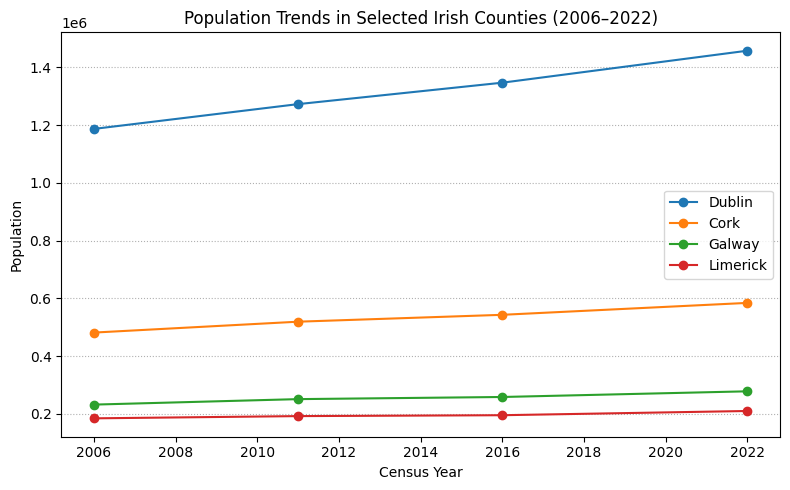

In [10]:
# Select a few counties to plot
selected_counties = ["Dublin", "Cork", "Galway", "Limerick"]

plot_df = pop_df[pop_df["County"].isin(selected_counties)]

# Plot population trends for selected counties
plt.figure(figsize=(8, 5))
for county in selected_counties:
    county_data = plot_df[plot_df["County"] == county]
    plt.plot(county_data["CensusYear"], county_data["Population"], marker="o", label=county)

plt.title("Population Trends in Selected Irish Counties (2006–2022)")
plt.xlabel("Census Year")
plt.ylabel("Population")
plt.grid(axis='y', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

**Key observations:**
- Population increased in all selected counties between 2006 and 2022.
- Dublin City shows the highest population levels across all census years.
- Population growth is evident across both urban and regional counties.


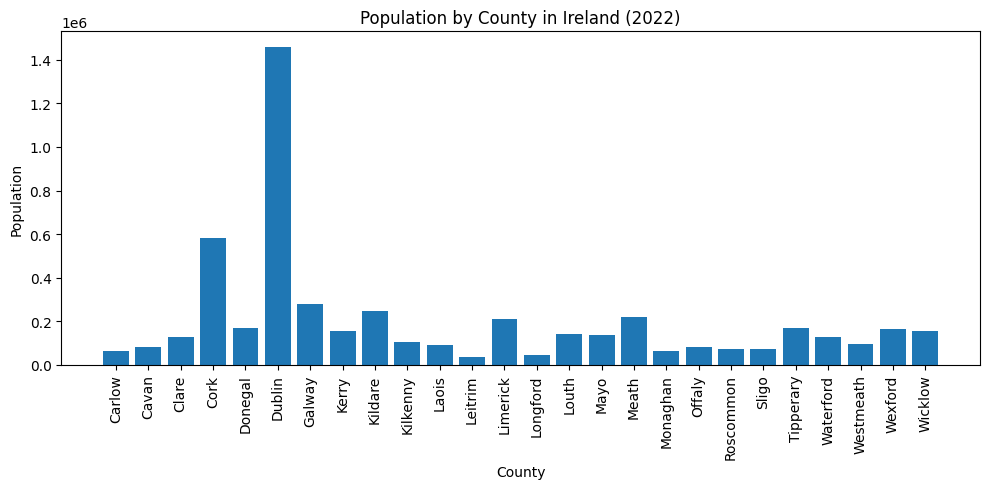

In [11]:
# Population by county in 2022
pop_2022 = pop_df[pop_df["CensusYear"] == 2022]

# Remove aggregated 'State' row
pop_2022 = pop_2022[pop_2022["County"] != "State"]

# Bar chart of population by county in 2022
plt.figure(figsize=(10, 5))
plt.bar(pop_2022["County"], pop_2022["Population"])
plt.xticks(rotation=90)
plt.title("Population by County in Ireland (2022)")
plt.xlabel("County")
plt.ylabel("Population")
plt.tight_layout()
plt.show()

**Key observations:**
- Population distribution in 2022 is highly concentrated, with Dublin accounting for a significantly larger share than other counties.

/tmp/ipykernel_25493/482769468.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: ((x["Population"].iloc[-1] / x["Population"].iloc[0]) - 1) * 100)


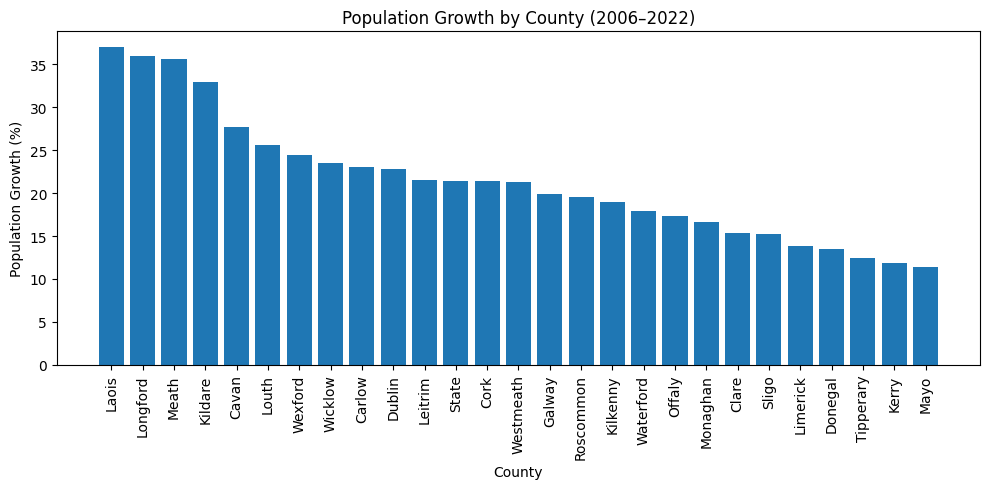

In [12]:
# Population growth from first to last census year
growth_summary = (
    pop_df
    .groupby("County")
    .apply(lambda x: ((x["Population"].iloc[-1] / x["Population"].iloc[0]) - 1) * 100)
    .reset_index(name="Population_Growth_%")
)

growth_summary = growth_summary.sort_values("Population_Growth_%", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(growth_summary["County"], growth_summary["Population_Growth_%"])
plt.xticks(rotation=90)
plt.title("Population Growth by County (2006–2022)")
plt.xlabel("County")
plt.ylabel("Population Growth (%)")
plt.tight_layout()
plt.show()



**Key observations:**
- All counties experienced population growth between 2006 and 2022, although the rate of growth varies considerably.
- Higher growth rates are generally observed in more urbanised counties.

---

## 5. Housing Trends

This section examines changes in housing supply across Irish counties between 2006 and 2022. The analysis focuses on the number of private households and how housing growth compares with population trends observed in the previous section.


In [13]:
# Load housing data
housing_data = "FY004B-housing.csv"
housing_path = datadir + housing_data

housing_df = pd.read_csv(housing_path)

print(housing_df.head())

      Statistic Label  Census Year         County and City    UNIT      VALUE
0  Private households         2011                   State  Number  1654208.0
1  Private households         2011                  Carlow  Number    19436.0
2  Private households         2011             Dublin City  Number   208008.0
3  Private households         2011  Dún Laoghaire-Rathdown  Number    75819.0
4  Private households         2011                  Fingal  Number    93146.0


In [14]:
# Display info about housing data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  279 non-null    object 
 1   Census Year      279 non-null    int64  
 2   County and City  279 non-null    object 
 3   UNIT             279 non-null    object 
 4   VALUE            279 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.0+ KB


In [15]:
# Drop unnecessary columns
housing_df.drop(columns=["Statistic Label", "UNIT"], inplace=True)

# Rename columns for clarity
housing_df.rename(columns={
    "Census Year": "CensusYear",
    "County and City": "County",
    "VALUE": "Households"
}, inplace=True)

# Convert CensusYear to numeric
housing_df["CensusYear"] = pd.to_numeric(housing_df["CensusYear"])

# Remove aggregated 'State' row
housing_df = housing_df[housing_df["County"] != "State"]

# Sort data
housing_df = housing_df.sort_values(by=["County", "CensusYear"])

print(housing_df.head())


     CensusYear  County  Households
1          2011  Carlow    19436.00
94         2011  Carlow    54187.00
187        2011  Carlow        2.79
32         2016  Carlow    20537.00
125        2016  Carlow    56609.00


In [16]:
#  Show unique counties in the dataset
housing_df["County"].unique()

array(['Carlow', 'Cavan', 'Clare', 'Cork City and Cork County', 'Donegal',
       'Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'Galway City',
       'Galway County', 'Kerry', 'Kildare', 'Kilkenny', 'Laois',
       'Leitrim', 'Limerick City and County', 'Longford', 'Louth', 'Mayo',
       'Meath', 'Monaghan', 'Offaly', 'Roscommon', 'Sligo',
       'South Dublin', 'Tipperary', 'Waterford City and County',
       'Westmeath', 'Wexford', 'Wicklow'], dtype=object)

In [17]:
# Group Dublin areas

# Create a grouped county column
housing_df["County_Grouped"] = housing_df["County"]

# List of Dublin areas
dublin_areas = [
    "Dublin City",
    "Fingal",
    "South Dublin",
    "Dún Laoghaire-Rathdown"
]

# Replace Dublin sub-areas with 'Dublin'
housing_df.loc[
    housing_df["County"].isin(dublin_areas),
    "County_Grouped"
] = "Dublin"


In [18]:
# Aggregate households by grouped county and census year
housing_grouped = (
    housing_df
    .groupby(["County_Grouped", "CensusYear"], as_index=False)["Households"]
    .sum()
)

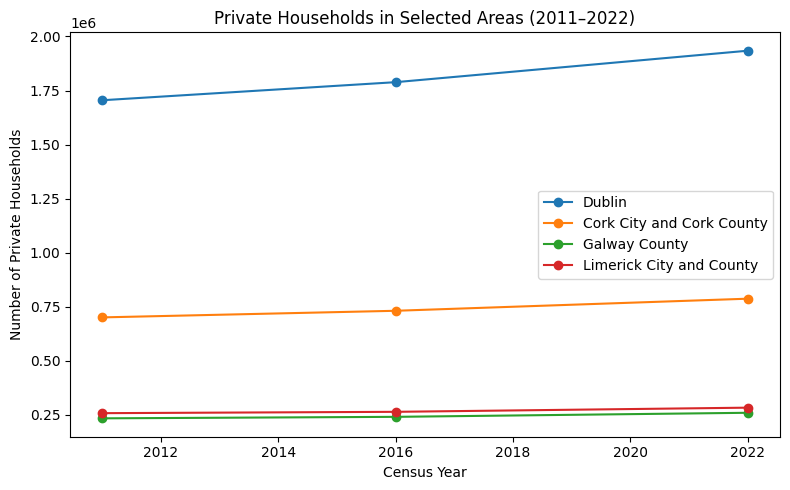

In [19]:
# Plot households in selected areas
selected_counties = ["Dublin", "Cork City and Cork County", "Galway County", "Limerick City and County"]

plot_df = housing_grouped[housing_grouped["County_Grouped"].isin(selected_counties)]

plt.figure(figsize=(8, 5))
for county in selected_counties:
    county_data = plot_df[plot_df["County_Grouped"] == county]
    plt.plot(
        county_data["CensusYear"],
        county_data["Households"],
        marker="o",
        label=county
    )

plt.title("Private Households in Selected Areas (2011–2022)")
plt.xlabel("Census Year")
plt.ylabel("Number of Private Households")
plt.legend()
plt.tight_layout()
plt.show()

**Observations:**
- The number of private households increased across all selected counties between 2011 and 2022.
- Dublin shows the largest absolute increase in housing supply, reflecting its higher population levels.
- Growth in housing supply varies by region, suggesting uneven responses to population demand.

In [20]:
# Create a wide table: one row per county, one column per year
housing_wide = housing_grouped.pivot_table(
    index="County_Grouped",
    columns="CensusYear",
    values="Households",
    aggfunc="sum"
)

# Calculate growth from 2011 to 2022
housing_wide["Housing_Growth_%"] = ((housing_wide[2022] / housing_wide[2011]) - 1) * 100

# Turn back into a normal dataframe for plotting
housing_growth = housing_wide["Housing_Growth_%"].dropna().reset_index()
housing_growth = housing_growth.sort_values("Housing_Growth_%", ascending=False)

housing_growth.head()


,County_Grouped,Housing_Growth_%
17,Meath,18.853763
9,Kildare,17.828560
0,Carlow,13.800843
26,Wicklow,13.628337
5,Dublin,13.439750


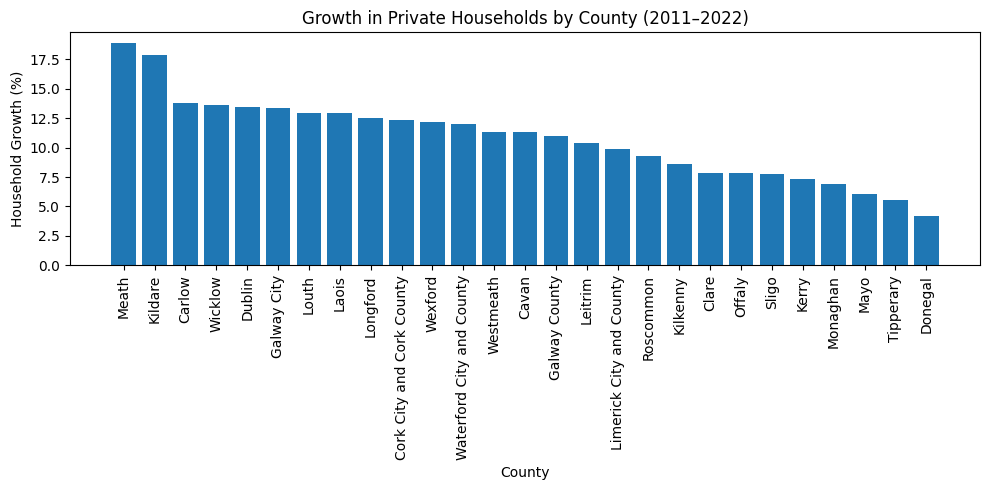

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(housing_growth["County_Grouped"], housing_growth["Housing_Growth_%"])
plt.xticks(rotation=90)
plt.title("Growth in Private Households by County (2011–2022)")
plt.xlabel("County")
plt.ylabel("Household Growth (%)")
plt.tight_layout()
plt.show()

**Observations:**
- Housing growth rates differ significantly between counties over the period analysed.
- Some counties experienced relatively high housing growth, while others showed more modest increases.
- These differences indicate that housing supply expansion has not been uniform across the country.


---

## 6. Immigration Patterns

This section examines changes in the non-Irish population across Irish counties using Census data for 2011, 2016, and 2022. The analysis focuses on identifying trends in immigration over time and differences between regions.

- Load and inspect immigration data

In [22]:
# Load immigration data
immigration_data = "F5002-immigration.csv"
immigration_path = datadir + immigration_data

imm_df = pd.read_csv(immigration_path)

print(imm_df.head())
imm_df.info()


                                     Statistic Label  Census Year Age Group  \
0  Population Usually Resident and Present in the...         2011  All ages   
1  Population Usually Resident and Present in the...         2011  All ages   
2  Population Usually Resident and Present in the...         2011  All ages   
3  Population Usually Resident and Present in the...         2011  All ages   
4  Population Usually Resident and Present in the...         2011  All ages   

  County of Usual Residence       Citizenship    UNIT      VALUE  
0                     State  All citizenships  Number  4525281.0  
1                     State           Ireland  Number  3927143.0  
2                     State           Croatia  Number      846.0  
3                     State            France  Number     9749.0  
4                     State           Germany  Number    11305.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40176 entries, 0 to 40175
Data columns (total 7 columns):
 #   Column    

- Show the unique data values for the columns County, Citizenship and Census Year

In [23]:
print(imm_df["County of Usual Residence"].unique()[:30])
print(imm_df["Citizenship"].unique()[:20])
print(imm_df["Census Year"].unique())

['State' 'Carlow' 'Dublin City' 'Dún Laoghaire-Rathdown' 'Fingal'
 'South Dublin' 'Kildare' 'Kilkenny' 'Laois' 'Longford' 'Louth' 'Meath'
 'Offaly' 'Westmeath' 'Wexford' 'Wicklow' 'Clare'
 'Cork City and Cork County' 'Kerry' 'Limerick City and County'
 'Tipperary' 'Waterford City and County' 'Galway City' 'Galway County'
 'Leitrim' 'Mayo' 'Roscommon' 'Sligo' 'Cavan' 'Donegal']
['All citizenships' 'Ireland' 'Croatia' 'France' 'Germany' 'Italy'
 'Latvia' 'Lithuania' 'Poland' 'Romania' 'Spain' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland (the)'
 'Other EU27 (2020)' 'Rest of Europe(1)' 'Africa(1)' 'China' 'India'
 'Other Asia(1)' 'Australia']
[2011 2016 2022]


- Clean the immigration data

In [24]:
# Drop unnecessary columns
imm_df.drop(columns=["Statistic Label", "UNIT"], inplace=True)

# Rename columns for clarity
imm_df.rename(columns={
    "Census Year": "CensusYear",
    "County of Usual Residence": "County",
    "VALUE": "Population"
}, inplace=True)

# Convert CensusYear to numeric
imm_df["CensusYear"] = pd.to_numeric(imm_df["CensusYear"])

# Remove aggregated 'State' row
imm_df = imm_df[imm_df["County"] != "State"]

print(imm_df.head())


    CensusYear Age Group  County       Citizenship  Population
27        2011  All ages  Carlow  All citizenships     54325.0
28        2011  All ages  Carlow           Ireland     47596.0
29        2011  All ages  Carlow           Croatia         0.0
30        2011  All ages  Carlow            France        65.0
31        2011  All ages  Carlow           Germany        63.0


- Aggregate Dublin areas for better visualisation

In [25]:
# Create grouped county column
imm_df["County_Grouped"] = imm_df["County"]

dublin_areas = [
    "Dublin City",
    "Fingal",
    "South Dublin",
    "Dún Laoghaire-Rathdown"
]

imm_df.loc[imm_df["County"].isin(dublin_areas), "County_Grouped"] = "Dublin"

- Print unique citizenships to visualize all the nationalities

In [26]:
print(imm_df["Citizenship"].unique()[:30])

['All citizenships' 'Ireland' 'Croatia' 'France' 'Germany' 'Italy'
 'Latvia' 'Lithuania' 'Poland' 'Romania' 'Spain' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland (the)'
 'Other EU27 (2020)' 'Rest of Europe(1)' 'Africa(1)' 'China' 'India'
 'Other Asia(1)' 'Australia' 'United States of America (the)' 'Brazil'
 'Other America(1)' 'Other countries' 'Multiple/Dual citizenship'
 'No citizenship' 'Citizenship not stated']


- Group citizenship into two categories

In [27]:
# Clean citizenship text
imm_df["Citizenship"] = imm_df["Citizenship"].astype(str).str.strip()

# Keep only real categories (optional but recommended)
imm_df = imm_df[imm_df["Citizenship"] != "All citizenships"].copy()

# Group into Ireland vs Non-Ireland
imm_df["Citizenship_Group"] = "Non-Irish"
imm_df.loc[imm_df["Citizenship"] == "Ireland", "Citizenship_Group"] = "Irish"


- Aggregate population by county, year, and citizenship group

In [28]:
imm_grouped = (
    imm_df
    .groupby(["County_Grouped", "CensusYear", "Citizenship_Group"], as_index=False)["Population"]
    .sum()
)

print(imm_grouped.head())
print(imm_grouped["Citizenship_Group"].unique())

  County_Grouped  CensusYear Citizenship_Group  Population
0         Carlow        2011             Irish     95896.8
1         Carlow        2011         Non-Irish     13552.5
2         Carlow        2016             Irish    100159.3
3         Carlow        2016         Non-Irish     13750.0
4         Carlow        2022             Irish    105726.6
['Irish' 'Non-Irish']


- Plot non-Irish population over time (selected counties)

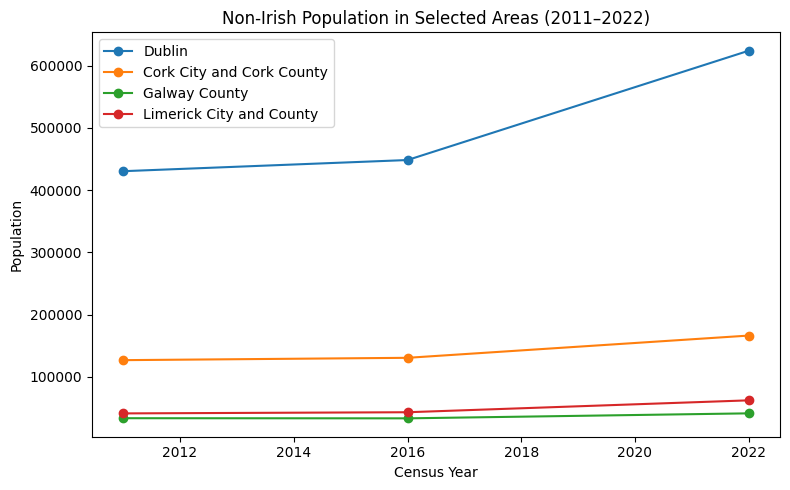

In [29]:
selected_areas = ["Dublin", "Cork City and Cork County", "Galway County", "Limerick City and County"]

imm_plot = imm_grouped[
    (imm_grouped["County_Grouped"].isin(selected_areas)) &
    (imm_grouped["Citizenship_Group"] == "Non-Irish")
]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for area in selected_areas:
    data = imm_plot[imm_plot["County_Grouped"] == area]
    plt.plot(data["CensusYear"], data["Population"], marker="o", label=area)

plt.title("Non-Irish Population in Selected Areas (2011–2022)")
plt.xlabel("Census Year")
plt.ylabel("Population")
plt.legend()
plt.tight_layout()
plt.show()

- Share of non-Irish population by county (2022)

In [30]:
# Pivot to get Irish and Non-Irish side-by-side
imm_wide = imm_grouped.pivot_table(
    index=["County_Grouped", "CensusYear"],
    columns="Citizenship_Group",
    values="Population",
    aggfunc="sum"
).reset_index()

print(imm_wide.columns)

Index(['County_Grouped', 'CensusYear', 'Irish', 'Non-Irish'], dtype='object', name='Citizenship_Group')


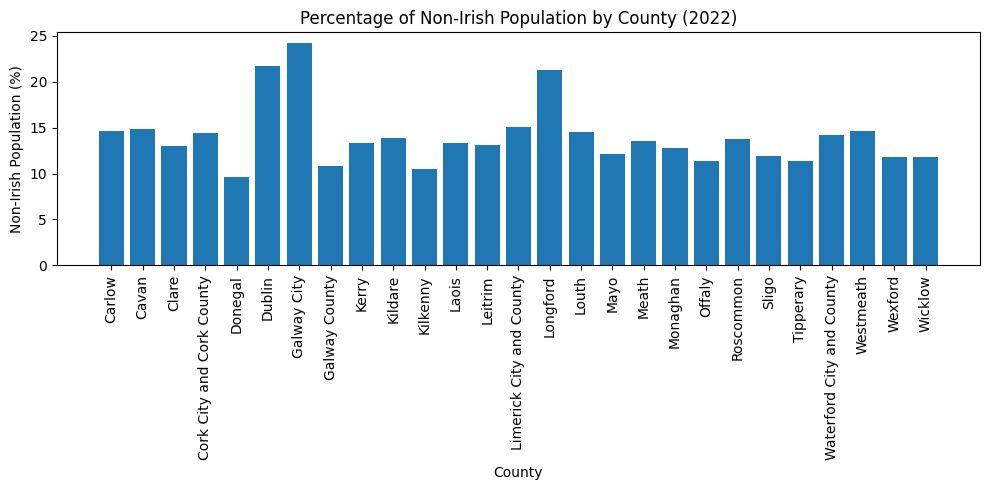

In [31]:
imm_wide = imm_grouped.pivot_table(
    index=["County_Grouped", "CensusYear"],
    columns="Citizenship_Group",
    values="Population",
    aggfunc="sum"
).reset_index()

# Ensure both columns exist
imm_wide["Irish"] = imm_wide.get("Irish", 0)
imm_wide["Non-Irish"] = imm_wide.get("Non-Irish", 0)

# Calculate total and percentage
imm_wide["Total"] = imm_wide["Irish"] + imm_wide["Non-Irish"]
imm_wide["Non_Irish_%"] = (imm_wide["Non-Irish"] / imm_wide["Total"]) * 100

# Filter to 2022
imm_2022 = imm_wide[imm_wide["CensusYear"] == 2022].copy()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(imm_2022["County_Grouped"], imm_2022["Non_Irish_%"])
plt.xticks(rotation=90)
plt.title("Percentage of Non-Irish Population by County (2022)")
plt.xlabel("County")
plt.ylabel("Non-Irish Population (%)")
plt.tight_layout()
plt.show()

**Observations:**
- The non-Irish population increased in all selected counties between 2011 and 2022.
- Dublin shows the largest non-Irish population in absolute terms.
- The share of non-Irish residents varies across counties, indicating differences in settlement patterns and regional attractiveness.


---

## 7. Combined Analysis

---

## 8. Conclusions

---

### 🔹Question 1 – Population growth  
- How has Ireland’s population changed over time across counties?

---

### 🔹Question 2 – Housing vs population  
- Has housing stock growth kept pace with population growth?

---

### 🔹Question 3 – Immigration patterns  
- How has the non-Irish population changed over time and across regions?

---

### 🔹Question 4 – Housing pressure & immigration  
- Is there a relationship between population growth, immigration, and housing availability?

---

## End

---